In [141]:
from requests import get
from json import loads
import time
import pandas as pd
from tqdm.notebook import trange, tqdm 
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
card_request = "bonecrusher giant"

In [147]:
card = loads(get(f"https://api.scryfall.com/cards/named?fuzzy={card_request}").text)

In [148]:
card["card_faces"]

[{'object': 'card_face',
  'name': 'Bonecrusher Giant',
  'mana_cost': '{2}{R}',
  'type_line': 'Creature — Giant',
  'oracle_text': "Whenever Bonecrusher Giant becomes the target of a spell, Bonecrusher Giant deals 2 damage to that spell's controller.",
  'power': '4',
  'toughness': '3',
  'flavor_text': 'Not every tale ends in glory.',
  'artist': 'Victor Adame Minguez',
  'artist_id': 'bd8f7368-5b10-4554-b6b8-d052c6aca89f',
  'illustration_id': 'c7f49422-def6-4502-bc02-38aee9924371'},
 {'object': 'card_face',
  'name': 'Stomp',
  'flavor_name': '',
  'mana_cost': '{1}{R}',
  'type_line': 'Instant — Adventure',
  'oracle_text': "Damage can't be prevented this turn. Stomp deals 2 damage to any target.",
  'artist': 'Victor Adame Minguez',
  'artist_id': 'bd8f7368-5b10-4554-b6b8-d052c6aca89f'}]

In [77]:
card.keys()

dict_keys(['object', 'id', 'oracle_id', 'multiverse_ids', 'name', 'printed_name', 'lang', 'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image', 'image_status', 'image_uris', 'mana_cost', 'cmc', 'type_line', 'printed_type_line', 'oracle_text', 'printed_text', 'colors', 'color_identity', 'keywords', 'legalities', 'games', 'reserved', 'foil', 'nonfoil', 'finishes', 'oversized', 'promo', 'reprint', 'variation', 'set_id', 'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri', 'scryfall_set_uri', 'rulings_uri', 'prints_search_uri', 'collector_number', 'digital', 'rarity', 'flavor_text', 'card_back_id', 'artist', 'artist_ids', 'illustration_id', 'border_color', 'frame', 'full_art', 'textless', 'booster', 'story_spotlight', 'edhrec_rank', 'prices', 'related_uris', 'purchase_uris'])

In [71]:
card["data"]

KeyError: 'data'

In [72]:
time.sleep(0.01)

### Parse deck

In [118]:
file = "Listes/Juri.txt" 
with open(file) as f:
    lines = f.readlines()

In [127]:
decklist = {"nom":[],"cmc":[],"text":[],"mana_cost":[],"type":[]}
for l in tqdm(lines):
    line = l.split("\n")[0]
    nb_card = int(line[0])
    card = line[2:]
    card = loads(get(f"https://api.scryfall.com/cards/named?fuzzy={card}").text)
    
    for _ in range(nb_card):
        decklist["nom"].append(card["name"])
        decklist["cmc"].append(card["cmc"])
        try:
            decklist["text"].append(card["oracle_text"])
            decklist["mana_cost"].append(card["mana_cost"])
            decklist["type"].append(card["type_line"])
        except KeyError:
            #TODO EDGE CASE: treat double face cards
            decklist["text"].append("NA")
            decklist["mana_cost"].append("NA")
            decklist["type"].append("NA")
    time.sleep(0.01)

  0%|          | 0/91 [00:00<?, ?it/s]

In [128]:
deck_df = pd.DataFrame(decklist)

In [132]:
deck_df

,nom,cmc,text,mana_cost,type
0,Arid Mesa,0.0,"{T}, Pay 1 life, Sacrifice Arid Mesa: Search y...",,Land
1,Badlands,0.0,({T}: Add {B} or {R}.),,Land — Swamp Mountain
2,Barbarian Ring,0.0,{T}: Add {R}. Barbarian Ring deals 1 damage to...,,Land
3,Blackcleave Cliffs,0.0,Blackcleave Cliffs enters the battlefield tapp...,,Land
4,Blightstep Pathway // Searstep Pathway,0.0,NA,NA,NA
...,...,...,...,...,...
95,Voldaren Epicure,1.0,"When Voldaren Epicure enters the battlefield, ...",{R},Creature — Vampire
96,Woe Strider,3.0,"When Woe Strider enters the battlefield, creat...",{2}{B},Creature — Horror
97,Wooded Foothills,0.0,"{T}, Pay 1 life, Sacrifice Wooded Foothills: S...",,Land
98,Zuran Orb,0.0,Sacrifice a land: You gain 2 life.,{0},Artifact


In [138]:
cmc = []
for i in range(len(deck_df)):
    if "Land" in deck_df["type"].iloc[i]:
        pass
    elif "NA" in deck_df["type"].iloc[i]:
        pass
    else:
        cmc.append(int(deck_df["cmc"].iloc[i]))

(array([ 3., 24., 17.,  8.,  3.,  1.,  2.,  0.,  0.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

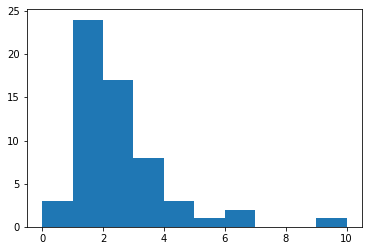

In [140]:
plt.hist(cmc)

<AxesSubplot:ylabel='Count'>

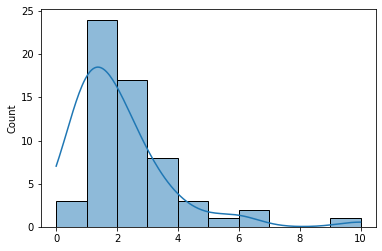

In [145]:
sns.histplot(data=cmc, kde=True, binwidth=1)